In [1]:
%load_ext autoreload
%autoreload 2
from pkg.forecast import SalesForecast
import pandas as pd
import os
import csv

Importing plotly failed. Interactive plots will not work.


In [2]:
sale = 'data/sales/monthly_sales.csv'
forecasts = 'data/results/Forecasts test.csv'
headers=['product', 'date', 'forecast', 'model']
if not os.path.exists(forecasts):
    with open(forecasts, "w", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
sale_df_total = pd.read_csv(sale)
forecast_df = pd.read_csv(forecasts)

products_fr = pd.unique(forecast_df['product'])
products = pd.unique(sale_df_total['product'])
sale_df_total.date += 62100

In [6]:
sale_df = sale_df_total[sale_df_total['product'] == "Cinnora AutoInjector"]
prod_fr = SalesForecast("Cinnora AutoInjector", sale_df, forecasts)
prod_fr.preprocess_data()
# prod_fr.model_selection()

In [7]:
prod_fr.prophet_df

,ds,y
0,2016-06-01,1014
1,2016-07-01,1170
2,2016-08-01,2128
3,2016-09-01,2634
4,2016-10-01,3246
...,...,...
85,2023-07-01,60208
86,2023-08-01,84556
87,2023-09-01,78708
88,2023-10-01,124396


In [10]:
prod_fr.best_model_type = "Prophet"
prod_fr.predict()
# prod_fr.redistribute_smoothing()

20:59:37 - cmdstanpy - INFO - Chain [1] start processing
20:59:38 - cmdstanpy - INFO - Chain [1] done processing


            ds       cap  floor
0   2016-06-01  149275.2  811.2
1   2016-07-01  149275.2  811.2
2   2016-08-01  149275.2  811.2
3   2016-09-01  149275.2  811.2
4   2016-10-01  149275.2  811.2
..         ...       ...    ...
191 2032-04-30  149275.2  811.2
192 2032-05-31  149275.2  811.2
193 2032-06-30  149275.2  811.2
194 2032-07-31  149275.2  811.2
195 2032-08-31  149275.2  811.2

[196 rows x 3 columns]


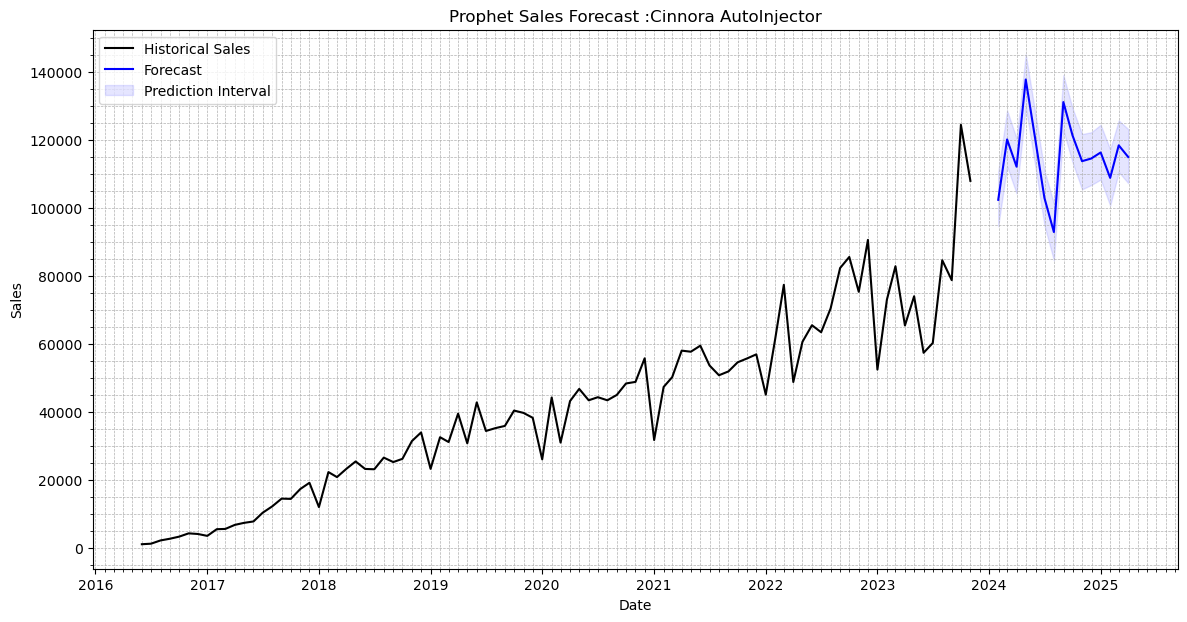

In [11]:
prod_fr.plot()